In [1]:
import cv2

import torch

import os
import sys
import pickle

sys.path.append('../..')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

from lib.dataloaders import imread
from lib.datasets import patches_path, patches_clean90_csv_path
from lib.datasets import get_train_test_img_ids_split, get_kfolds
from lib.dataloaders import PatchesDataset
from lib.augmentations import (augment_empty, augment_v1, augment_v1_wo_blur, normalize_he, 
                               augment_he_D8, normalizer)

In [2]:
train_img_ids, test_img_ids = get_train_test_img_ids_split()

In [3]:
train_loader = torch.utils.data.DataLoader(
    PatchesDataset(train_img_ids, csv_path=patches_clean90_csv_path, scale=0.5,
                   transform=augment_empty),
    batch_size=64, shuffle=True, num_workers=0,
)

In [4]:
len(train_loader)

20614

In [5]:
import staintools
stain_src = staintools.read_image("../../wsi_sample.png")
# stain_src = staintools.LuminosityStandardizer.standardize(stain_src)
normalizer.fit(stain_src)

In [13]:
%%time
img, mask, labes, provider, isup_grade, g_score = next(iter(train_loader))

CPU times: user 3.48 s, sys: 85.9 ms, total: 3.56 s
Wall time: 578 ms


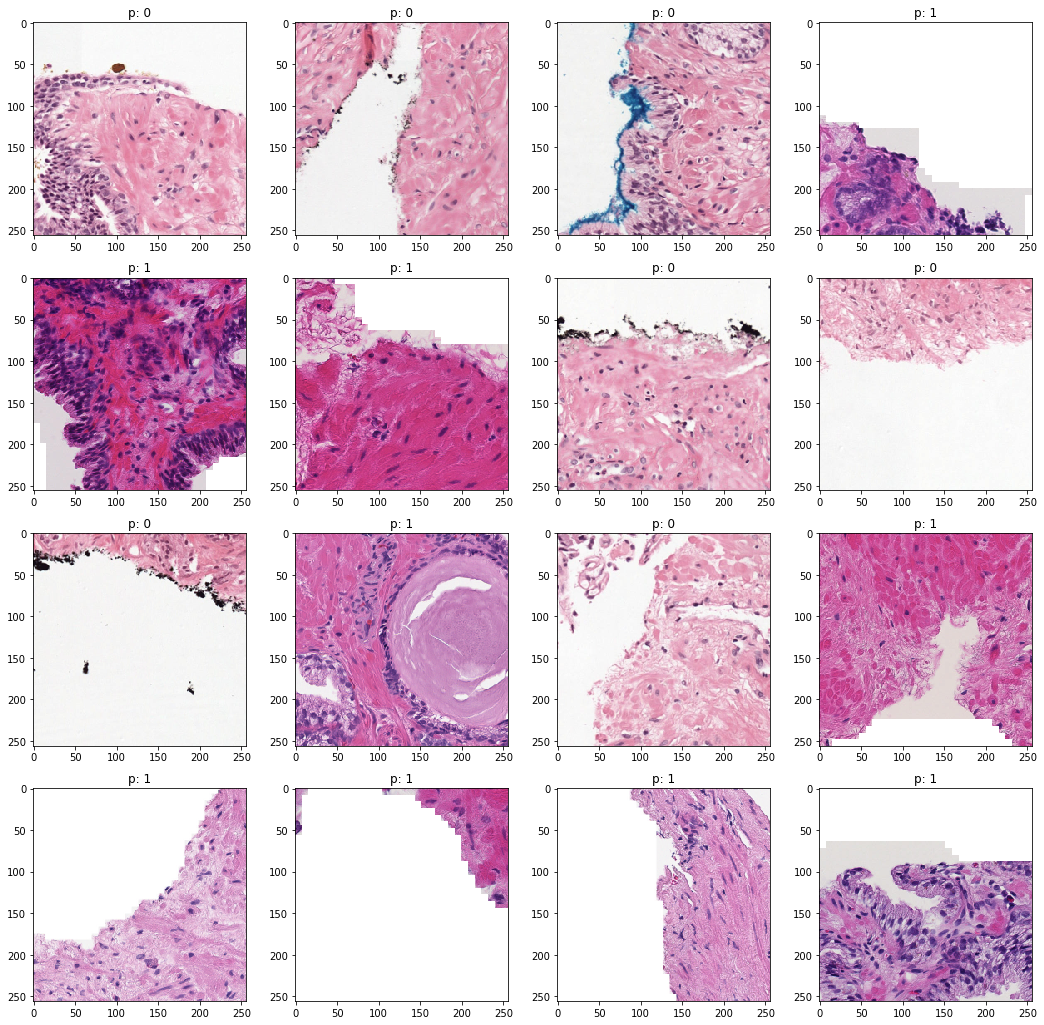

In [14]:
fig, axs = plt.subplots(4, 4, figsize=(18, 18))
axs = axs.ravel()

for i in range(4*4):
    axs[i].imshow(img[i].transpose(0, -1));
    axs[i].set_title(f"p: {provider[i]}");